<a href="https://colab.research.google.com/github/esferita006/Codigos-en-R/blob/main/Codigos_en_R_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>EJERCICIOS_EN R</i></h1>
</font>

<font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Acontinuacon se presentan algunos ejercicios realizados en R(hay dos versiones de cada codigo , siendo el ultimo con la mejoras y documentado estilo python) </i></h5>
</font>


In [2]:
###### Ejercicio 1
#
# 1. Elabora un programa que tenga como parametros una distribucion inicial
# y una matriz de transiciones. El programa debe generar una trayectoria de la
# cadena a tiempo n, y determinar la distribucion estacionaria de la cadena,
# si existe. Usa tu programa para responder lo siguiente.
# Considera la matriz que se encuentra en el siguiente link:
# http://www.columbia.edu/~ww2040/4106S11/MC_BondRating.pdf, corresponde a
# informaci ́on hist ́orica de S&P (2001), una de las agencias calificadoras
# mas importantes del sistema financiero.


# Definir la matriz de transiciones

matrix_text <- "
AAA 0.9366 0.0583 0.0040 0.0009 0.0002 0 0 0
AA 0.0066 0.9172 0.0694 0.0049 0.0006 0.0009 0.0002 0.0002
A 0.0007 0.0225 0.9176 0.0518 0.0049 0.0020 0.0001 0.0004
BBB 0.0003 0.0026 0.0483 0.8924 0.0444 0.0081 0.0016 0.0023
BB 0.0003 0.0006 0.0044 0.0666 0.8323 0.0746 0.0105 0.0107
B 0 0.0010 0.0032 0.0046 0.0572 0.8362 0.0384 0.0594
CCC 0.0015 0 0.0029 0.0088 0.0191 0.1028 0.6123 0.2526
Default 0 0 0 0 0 0 0 1.0000
"

# Convertir la cadena de texto a una matriz numérica

matriz_data <- as.matrix(read.table(text = matrix_text, header = FALSE, skip = 1))
header<-t(matriz_data[,1])
matriz_ejercicio <- matriz_data[, -1]
matriz_transiciones <- matrix(as.numeric(matriz_ejercicio), nrow = 8, ncol = 8)
colnames(matriz_transiciones) <- as.list(header)
matriz_transiciones
# Definir la distribución inicial (por ejemplo, igualmente distribuida entre
# los estados)

distribucion_inicial <- rep(1/nrow(matriz_transiciones), nrow(matriz_transiciones))

# Simular la cadena de Markov a tiempo 10

tiempo_n <- 10
resultado_simulacion <- simular_cadena_markov(distribucion_inicial, matriz_transiciones, tiempo_n)
cat("Distribución a tiempo", tiempo_n, ":\n")
print(resultado_simulacion)

# Calcular la distribución estacionaria (si existe)

distribucion_estacionaria <- calcular_distribucion_estacionaria(matriz_transiciones)
if (!is.null(distribucion_estacionaria)) {
  cat("Distribución estacionaria:\n")
  print(distribucion_estacionaria)
} else {
  cat("La cadena de Markov no tiene una distribución estacionaria.\n")
}

# Supón que una nueva emision es calificada como AAA al momento de su originacion.
#¿Cual es la probabilidad de que tenga una calificaci ́on de default luego de 35
# años?

# Definir la distribución inicial (AAA al momento de la originación)

distribucion_inicial <- c(1, rep(0, nrow(matriz_transiciones)-1))

# Simular la cadena de Markov a tiempo 35

tiempo_n <- 35
resultado_simulacion <- simular_cadena_markov(distribucion_inicial, matriz_transiciones, tiempo_n)

# Extraer la probabilidad de Default después de 35 años

prob_default_35_anios <- resultado_simulacion["Default"]
cat("Probabilidad de Default después de", tiempo_n, "años:", prob_default_35_anios, "\n")

# b) La matriz del modelo ¿tiene distribucion estacionaria?
# ¿Puedes solucionarlo con R?

distribucion_estacionaria <- calcular_distribucion_estacionaria(matriz_transiciones)
if (!is.null(distribucion_estacionaria)) {
  cat("Distribución estacionaria:\n")
  print(distribucion_estacionaria)
} else {
  cat("La cadena de Markov no tiene una distribución estacionaria.\n")
}



AAA,AA,A,BBB,BB,B,CCC,Default
0.9366,0.0583,0.0040,0.0009,0.0002,0.0000,0.0000,0.0000
0.0066,0.9172,0.0694,0.0049,0.0006,0.0009,0.0002,0.0002
0.0007,0.0225,0.9176,0.0518,0.0049,0.0020,0.0001,0.0004
0.0003,0.0026,0.0483,0.8924,0.0444,0.0081,0.0016,0.0023
0.0003,0.0006,0.0044,0.0666,0.8323,0.0746,0.0105,0.0107
0.0000,0.0010,0.0032,0.0046,0.0572,0.8362,0.0384,0.0594
0.0015,0.0000,0.0029,0.0088,0.0191,0.1028,0.6123,0.2526
0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


ERROR: Error in simular_cadena_markov(distribucion_inicial, matriz_transiciones, : could not find function "simular_cadena_markov"


In [1]:
# =============================================================================
# Cadena de Markov: distribución a tiempo n, trayectoria y distribución estacionaria
# Aplicación: matriz S&P (2001) de migraciones de rating (incluye Default absorbente)
# =============================================================================

# -----------------------------
# 1) Leer y construir la matriz de transición P
# -----------------------------
matrix_text <- "
AAA 0.9366 0.0583 0.0040 0.0009 0.0002 0 0 0
AA 0.0066 0.9172 0.0694 0.0049 0.0006 0.0009 0.0002 0.0002
A 0.0007 0.0225 0.9176 0.0518 0.0049 0.0020 0.0001 0.0004
BBB 0.0003 0.0026 0.0483 0.8924 0.0444 0.0081 0.0016 0.0023
BB 0.0003 0.0006 0.0044 0.0666 0.8323 0.0746 0.0105 0.0107
B 0 0.0010 0.0032 0.0046 0.0572 0.8362 0.0384 0.0594
CCC 0.0015 0 0.0029 0.0088 0.0191 0.1028 0.6123 0.2526
Default 0 0 0 0 0 0 0 1.0000
"

df <- read.table(text = matrix_text, header = FALSE, stringsAsFactors = FALSE)
states <- df[[1]]
P <- as.matrix(df[, -1])
mode(P) <- "numeric"
rownames(P) <- states
colnames(P) <- states

# Validación rápida: filas suman 1
row_sums <- rowSums(P)
if (max(abs(row_sums - 1)) > 1e-10) {
  stop("La matriz de transición no es estocástica por filas (hay filas que no suman 1).")
}

# -----------------------------
# 2) Utilidades: potencia de matriz y distribución a tiempo n
# -----------------------------
mat_pow <- function(M, n) {
  # Exponenciación rápida (O(log n)) por cuadrados
  if (n < 0 || n != as.integer(n)) stop("n debe ser entero >= 0")
  if (n == 0) return(diag(nrow(M)))

  result <- diag(nrow(M))
  base <- M
  k <- n

  while (k > 0) {
    if (k %% 2 == 1) result <- result %*% base
    base <- base %*% base
    k <- k %/% 2
  }
  result
}

markov_distribution <- function(p0, P, n) {
  # p_n = p0 * P^n
  if (length(p0) != nrow(P)) stop("p0 debe tener longitud igual al número de estados.")
  if (abs(sum(p0) - 1) > 1e-10) stop("p0 debe sumar 1.")
  if (any(p0 < -1e-12)) stop("p0 no puede tener probabilidades negativas.")

  pn <- as.numeric(p0 %*% mat_pow(P, n))
  names(pn) <- colnames(P)
  pn
}

# -----------------------------
# 3) Simular una trayectoria (estados) hasta tiempo n
# -----------------------------
simulate_path <- function(initial_state, P, n) {
  if (!(initial_state %in% rownames(P))) stop("Estado inicial inválido.")
  if (n < 0 || n != as.integer(n)) stop("n debe ser entero >= 0")

  path <- character(n + 1)
  path[1] <- initial_state

  for (t in 1:n) {
    current <- path[t]
    path[t + 1] <- sample(colnames(P), size = 1, prob = P[current, ])
  }
  path
}

# -----------------------------
# 4) Distribución estacionaria (si existe)
# -----------------------------
stationary_distribution <- function(P, tol = 1e-10) {
  # π tal que π = π P, con sum(π)=1, π >= 0
  # Equivalentemente: t(P) * π^T = π^T (eigenvalue 1)
  eig <- eigen(t(P))
  idx <- which.min(abs(eig$values - 1))
  v <- Re(eig$vectors[, idx])

  # Normalización y ajuste de signo
  if (sum(v) < 0) v <- -v
  v[v < 0] <- 0
  pi <- v / sum(v)

  # Verificación
  err <- max(abs(pi - as.numeric(pi %*% P)))
  if (err > tol) {
    warning("No se pudo verificar π = πP con la tolerancia dada. La cadena puede ser reducible/no ergódica.")
  }
  names(pi) <- colnames(P)
  pi
}

# =============================================================================
# USO 1: Distribución a tiempo n=10 desde distribución inicial uniforme
# =============================================================================
p0_uniform <- rep(1 / nrow(P), nrow(P))
pn_10 <- markov_distribution(p0_uniform, P, 10)
cat("Distribución a tiempo n=10 (desde uniforme):\n")
print(pn_10)

# Ejemplo de trayectoria
set.seed(123)
path_10 <- simulate_path("AAA", P, 10)
cat("\nTrayectoria simulada desde AAA (n=10):\n")
print(path_10)

# =============================================================================
# USO 2: AAA inicial -> probabilidad de Default a 35 años
# =============================================================================
p0_AAA <- rep(0, nrow(P)); names(p0_AAA) <- states
p0_AAA["AAA"] <- 1

pn_35 <- markov_distribution(p0_AAA, P, 35)
prob_default_35 <- pn_35["Default"]

cat("\nProbabilidad de Default después de 35 años desde AAA:\n")
print(prob_default_35)

# =============================================================================
# USO 3: Distribución estacionaria (si existe)
# =============================================================================
pi <- stationary_distribution(P)
cat("\nDistribución estacionaria calculada (una solución):\n")
print(pi)


Distribución a tiempo n=10 (desde uniforme):
       AAA         AA          A        BBB         BB          B        CCC 
0.07286989 0.11880646 0.16791172 0.14203324 0.08730314 0.08254579 0.01348770 
   Default 
0.31504206 

Trayectoria simulada desde AAA (n=10):
 [1] "AAA" "AAA" "AAA" "AAA" "AAA" "AA"  "AA"  "AA"  "AA"  "AA"  "AA" 

Probabilidad de Default después de 35 años desde AAA:
   Default 
0.06153849 

Distribución estacionaria calculada (una solución):
    AAA      AA       A     BBB      BB       B     CCC Default 
      0       0       0       0       0       0       0       1 


<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>EJERCICIOS_2</i></h1>
</font>

Estimación de E(Nt): 499.228 
Estimación de V(Nt): 474.4545 


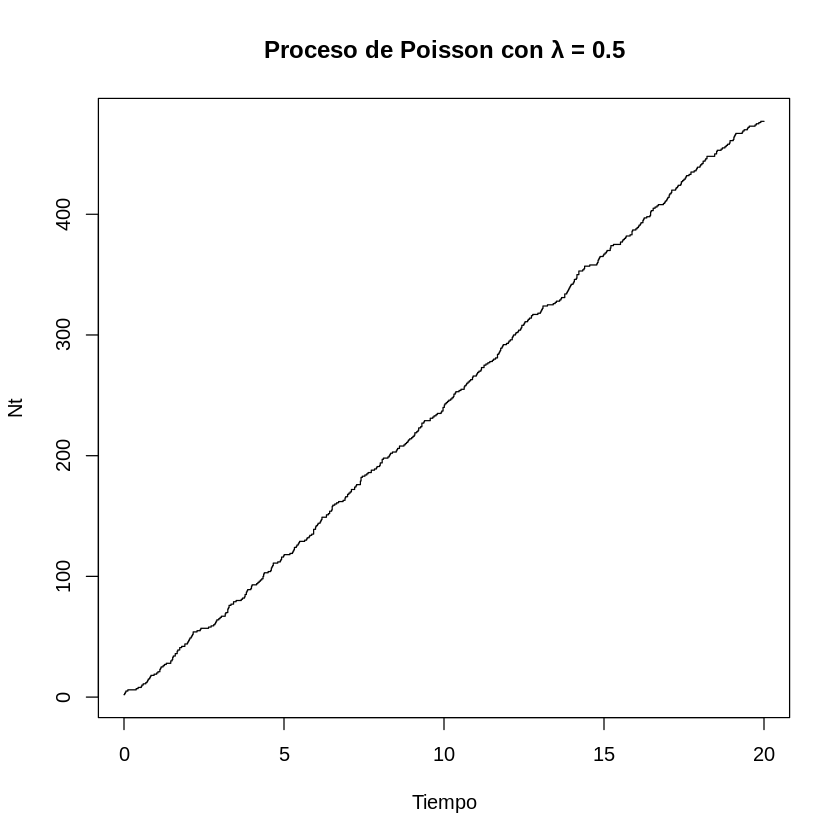

In [3]:
proceso_poisson <- function(lam, tiempo) {
  num_intervalos <- 1000
  intervalos <- seq(0, tiempo, length.out = num_intervalos)

  eventos <- rpois(num_intervalos, lam)

  Nt <- cumsum(eventos)

  return(list(intervalos = intervalos, Nt = Nt))
}

estimar_media_varianza <- function(Nt) {
  media_estimada <- mean(Nt)
  varianza_estimada <- var(Nt)
  return(list(media_estimada = media_estimada, varianza_estimada = varianza_estimada))
}

main <- function() {
  # (a) Generar una trayectoria del PP Nt con λ = 0.5 en el intervalo [0, 20]
  lam <- 0.5
  tiempo_a <- 20
  resultado_a <- proceso_poisson(lam, tiempo_a)

  plot(resultado_a$intervalos, resultado_a$Nt, type = "s", main = 'Proceso de Poisson con λ = 0.5',
       xlab = 'Tiempo', ylab = 'Nt')

  # (b) Generar 1000 realizaciones con el mismo parámetro y estimar E(Nt) y V(Nt)
  num_realizaciones <- 1000
  resultados <- numeric(num_realizaciones)

  for (i in 1:num_realizaciones) {
    resultados[i] <- tail(proceso_poisson(lam, tiempo_a)$Nt, 1)
  }

  # Calcular la estimación de la media y varianza
  estimacion <- estimar_media_varianza(resultados)

  # Imprimir resultados
  cat('Estimación de E(Nt):', estimacion$media_estimada, '\n')
  cat('Estimación de V(Nt):', estimacion$varianza_estimada, '\n')
}

main()



--- Estimación en t = T ---
E[N(20)] estimada:  9.9830 | teórica: 10.0000
Var[N(20)] estimada: 9.7585 | teórica: 10.0000


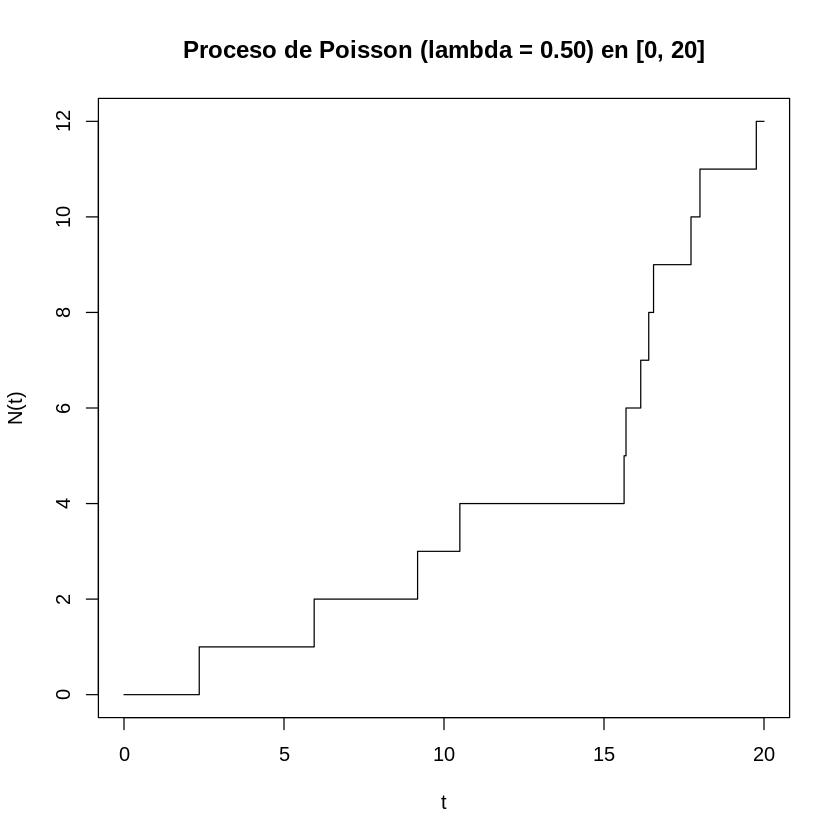

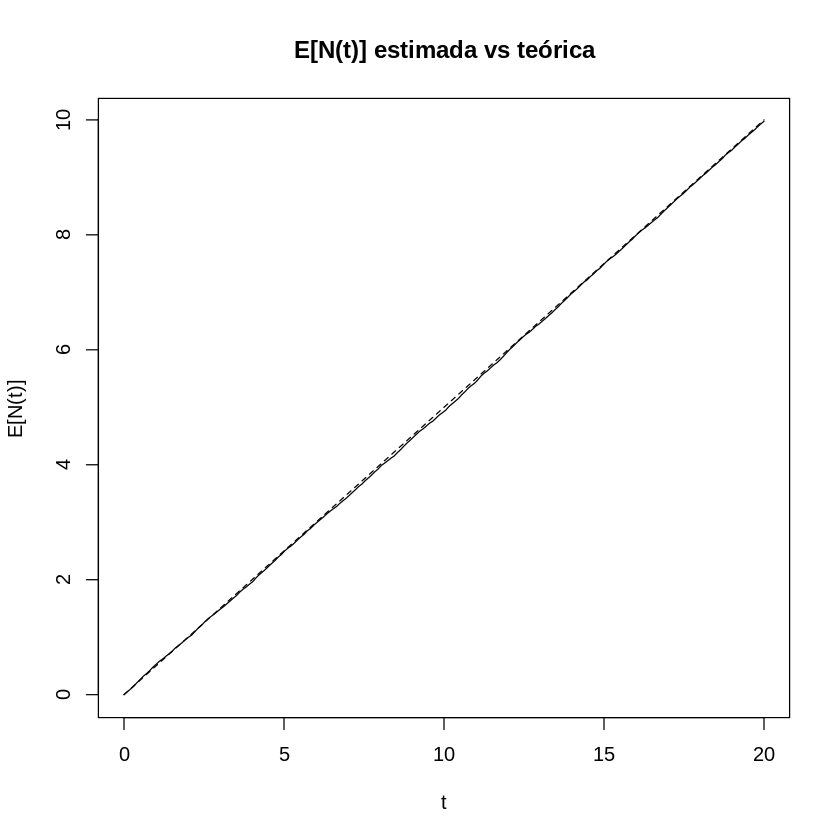

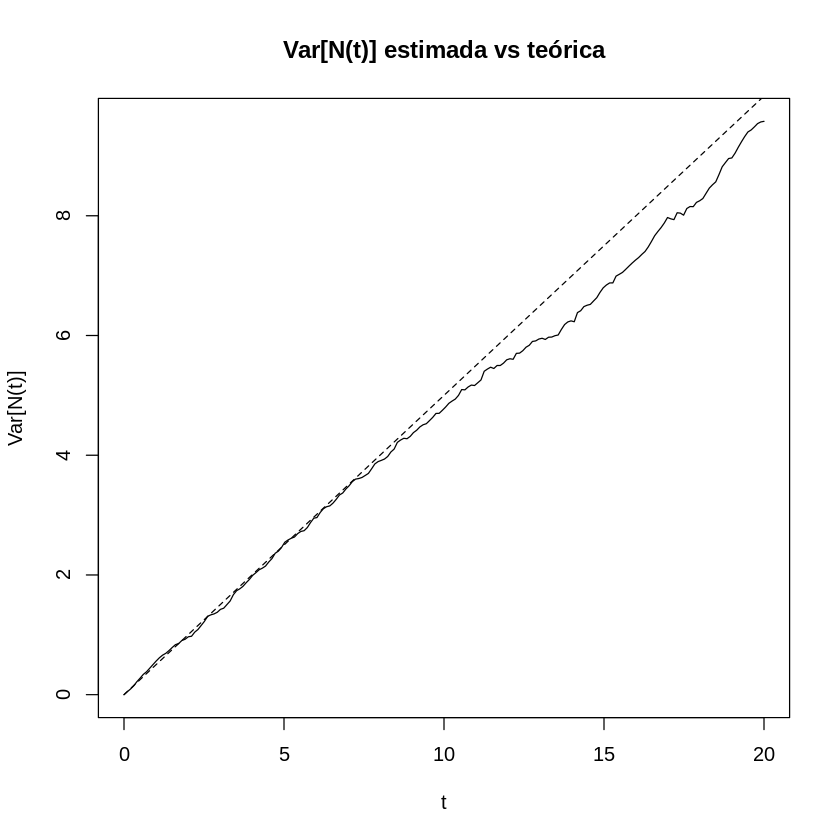

In [4]:
# =============================================================================
# Proceso de Poisson N(t) con tasa lambda
# =============================================================================
# Propiedades:
#   N(0)=0
#   Incrementos independientes
#   N(t+dt)-N(t) ~ Poisson(lambda * dt)
#   E[N(t)] = lambda * t
#   Var[N(t)] = lambda * t
# =============================================================================

simulate_poisson_path <- function(lambda, T, n_steps = 2000) {
  # Simula una trayectoria en [0, T] usando discretización fina.
  #
  # Args:
  #   lambda: tasa (>0)
  #   T: tiempo final (>0)
  #   n_steps: número de puntos de la malla (>=2)
  #
  # Returns:
  #   list(time=..., N=..., dt=...)

  if (!is.numeric(lambda) || lambda <= 0) stop("lambda debe ser > 0")
  if (!is.numeric(T) || T <= 0) stop("T debe ser > 0")
  if (!is.numeric(n_steps) || n_steps < 2) stop("n_steps debe ser >= 2")

  time <- seq(0, T, length.out = n_steps)
  dt <- time[2] - time[1]

  # Incrementos correctos: Poisson(lambda * dt)
  increments <- rpois(n_steps - 1, lambda * dt)

  # N(0)=0, luego acumulamos incrementos
  N <- c(0L, cumsum(increments))

  list(time = time, N = N, dt = dt)
}


estimate_mean_var_final <- function(lambda, T, n_rep = 1000, seed = 123) {
  # Estima E[N(T)] y Var[N(T)] por Monte Carlo y compara con teoría.

  if (!is.numeric(n_rep) || n_rep <= 1) stop("n_rep debe ser >= 2")
  set.seed(seed)

  # N(T) ~ Poisson(lambda * T) EXACTO (no hace falta discretizar)
  # pero para coherencia con la simulación de trayectorias, aquí usamos el atajo exacto:
  samples <- rpois(n_rep, lambda * T)

  list(
    mean_hat = mean(samples),
    var_hat = var(samples),
    mean_theory = lambda * T,
    var_theory = lambda * T,
    samples = samples
  )
}


estimate_mean_var_over_time <- function(lambda, T, n_steps = 200, n_rep = 1000, seed = 123) {
  # Estima E[N(t)] y Var[N(t)] en una malla de tiempos.
  # Simula trayectorias completas y calcula estadísticos por tiempo.

  set.seed(seed)

  time <- seq(0, T, length.out = n_steps)
  dt <- time[2] - time[1]

  # Matriz: filas=replicaciones, cols=tiempos
  N_mat <- matrix(0L, nrow = n_rep, ncol = n_steps)

  for (i in 1:n_rep) {
    inc <- rpois(n_steps - 1, lambda * dt)
    N_mat[i, ] <- c(0L, cumsum(inc))
  }

  mean_hat <- colMeans(N_mat)
  var_hat <- apply(N_mat, 2, var)

  list(
    time = time,
    mean_hat = mean_hat,
    var_hat = var_hat,
    mean_theory = lambda * time,
    var_theory = lambda * time
  )
}


main <- function() {
  # -----------------------------
  # Parámetros
  # -----------------------------
  lambda <- 0.5
  T <- 20

  # (a) Una trayectoria en [0,20]
  set.seed(42)
  path <- simulate_poisson_path(lambda, T, n_steps = 2000)

  plot(path$time, path$N, type = "s",
       main = sprintf("Proceso de Poisson (lambda = %.2f) en [0, %.0f]", lambda, T),
       xlab = "t", ylab = "N(t)")

  # (b) 1000 realizaciones y estimación de E[N(T)] y Var[N(T)]
  est <- estimate_mean_var_final(lambda, T, n_rep = 1000, seed = 123)

  cat("\n--- Estimación en t = T ---\n")
  cat(sprintf("E[N(%.0f)] estimada:  %.4f | teórica: %.4f\n", T, est$mean_hat, est$mean_theory))
  cat(sprintf("Var[N(%.0f)] estimada: %.4f | teórica: %.4f\n", T, est$var_hat, est$var_theory))

  # (Opcional) estimar media/varianza a lo largo del tiempo
  est_time <- estimate_mean_var_over_time(lambda, T, n_steps = 200, n_rep = 1000, seed = 123)

  # Gráficas de comparación (media y varianza vs teoría)
  plot(est_time$time, est_time$mean_hat, type = "l",
       main = "E[N(t)] estimada vs teórica",
       xlab = "t", ylab = "E[N(t)]")
  lines(est_time$time, est_time$mean_theory, lty = 2)

  plot(est_time$time, est_time$var_hat, type = "l",
       main = "Var[N(t)] estimada vs teórica",
       xlab = "t", ylab = "Var[N(t)]")
  lines(est_time$time, est_time$var_theory, lty = 2)
}

main()
